![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

In [61]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head(10)  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

No hay valores nulos dentro del conjunto de datos

In [63]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

No hay valores NA en el dataset

In [64]:
df['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

<Axes: xlabel='severe_decelerations'>

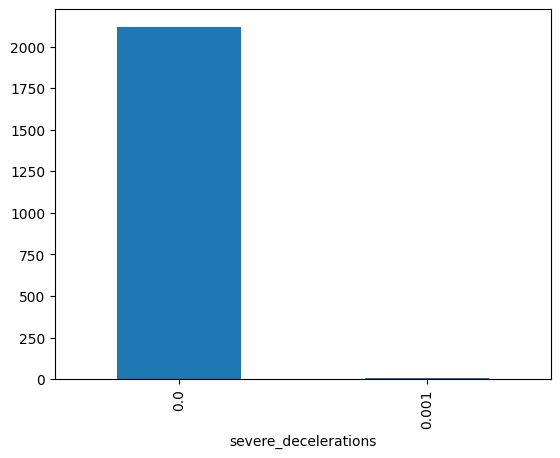

In [65]:
df['severe_decelerations'].value_counts().plot(kind='bar')

Fetal_health es el target y se observa un desbalance en los datos del 1 respecto el 2 y 3

Antes de balancear un poco la data, se procederá a eliminar columnas redundantes

<Axes: >

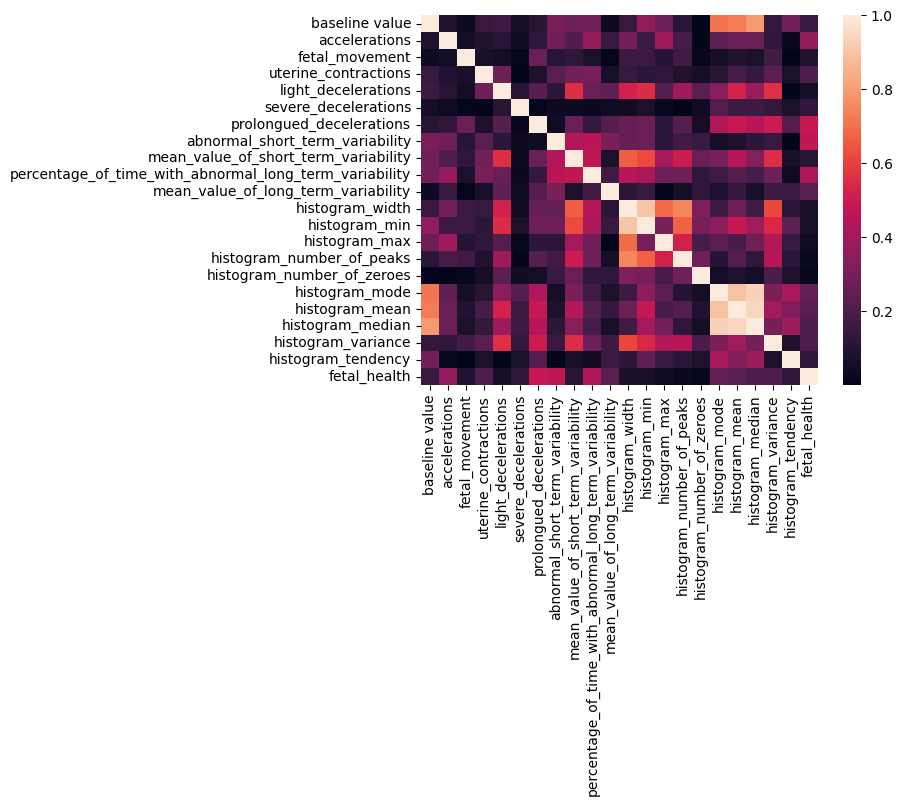

In [66]:
corr_mat = df.corr().abs()
sns.heatmap(corr_mat)

In [67]:
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.85:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df_clean = df[selected_columns]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Se eliminaron 3 columnas que tenian una similitud del 85%

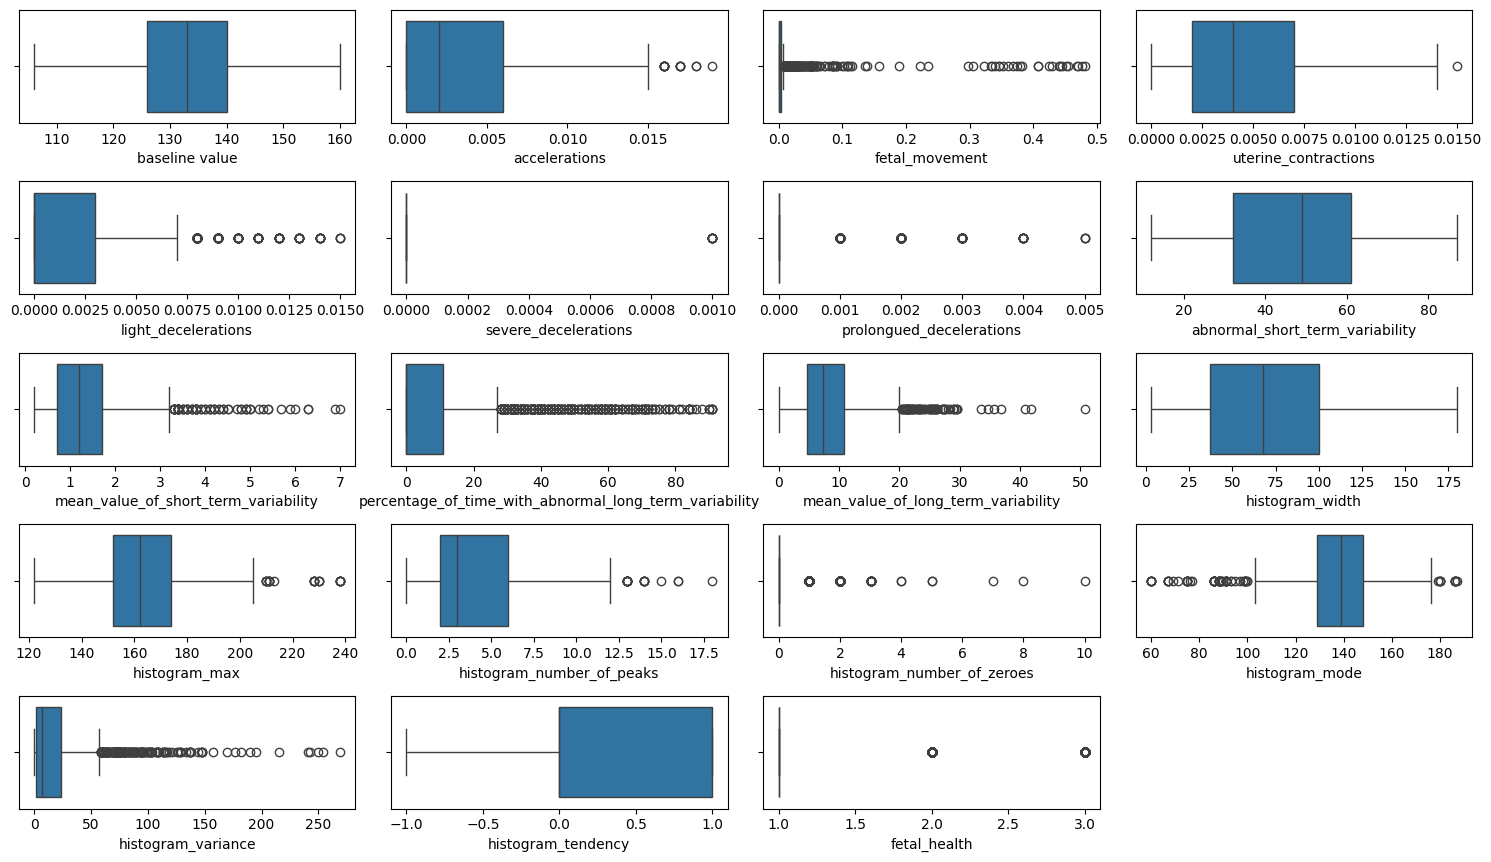

In [68]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_clean.columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=df_clean[col])

plt.tight_layout()
plt.show()

In [69]:

# Seleccionar las características y la variable objetivo
X = df_clean.drop('fetal_health', axis=1)
y = df_clean['fetal_health']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Crear una lista de modelos
model_list = [KNeighborsClassifier(), RandomForestClassifier(n_estimators=100, random_state=4), DecisionTreeClassifier(random_state=4)]
model_name_list = ["KNN", "RF", "DT"]

# Evaluar los modelos
for model, model_name in zip(model_list, model_name_list):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Modelo: {model_name}")
    print(f"Precisión: {accuracy:.2f}")
    print(f"Precisión (Weighted): {precision:.2f}")
    print(f"Exhaustividad (Weighted): {recall:.2f}")
    print(f"Puntaje F1 (Weighted): {f1:.2f}")
    print()


Modelo: KNN
Precisión: 0.89
Precisión (Weighted): 0.89
Exhaustividad (Weighted): 0.89
Puntaje F1 (Weighted): 0.89

Modelo: RF
Precisión: 0.95
Precisión (Weighted): 0.95
Exhaustividad (Weighted): 0.95
Puntaje F1 (Weighted): 0.95

Modelo: DT
Precisión: 0.92
Precisión (Weighted): 0.93
Exhaustividad (Weighted): 0.92
Puntaje F1 (Weighted): 0.92



Validacion cruzada

In [70]:
# Validación cruzada para Random Forest
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=4), X, y, cv=5, scoring='accuracy')
print("Validación cruzada para Random Forest:")
print("Puntuaciones de precisión:", rf_cv_scores)
print("Precisión media:", rf_cv_scores.mean())
print()

# Validación cruzada para KNN
knn_cv_scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5, scoring='accuracy')
print("Validación cruzada para KNN:")
print("Puntuaciones de precisión:", knn_cv_scores)
print("Precisión media:", knn_cv_scores.mean())
print()

# Validación cruzada para Árbol de Decisión
dt_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=4), X, y, cv=5, scoring='accuracy')
print("Validación cruzada para Árbol de Decisión:")
print("Puntuaciones de precisión:", dt_cv_scores)
print("Precisión media:", dt_cv_scores.mean())

Validación cruzada para Random Forest:
Puntuaciones de precisión: [0.86619718 0.91294118 0.93176471 0.87529412 0.70823529]
Precisión media: 0.8588864954432477

Validación cruzada para KNN:
Puntuaciones de precisión: [0.83802817 0.83058824 0.89176471 0.82117647 0.72470588]
Precisión media: 0.8212526926263463

Validación cruzada para Árbol de Decisión:
Puntuaciones de precisión: [0.85680751 0.88470588 0.92235294 0.84       0.68470588]
Precisión media: 0.8377144435238885


Parece overfitting